<font size = "5"> **Chapter 2: [Diffraction](CH2_00-Diffraction.ipynb)** </font>


<hr style="height:1px;border-top:4px solid #FF8200" />


# Relrod - Sample Geometry and Excitation Error

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/gduscher/MSE672-Introduction-to-TEM/blob/main//Diffraction/CH2_06b-Relrod.ipynb)
 
part of

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](../_MSE672_Intro_TEM.ipynb)**</font>

**Spring 2025**<br>
by Gerd Duscher

Microscopy Facilities<br>
Institute of Advanced Materials & Manufacturing<br>
Materials Science & Engineering<br>
The University of Tennessee, Knoxville


Background and methods to analysis and quantification of data acquired with transmission electron microscopes.




In [7]:
import sys
if 'google.colab' in sys.modules:
    !{sys.executable} -m pip install ipympl
    
%matplotlib  widget
import matplotlib.pyplot as plt
import numpy as np


from mpl_toolkits.mplot3d import Axes3D  # 3D plotting

__notebook_version__ = '2021.02.09'
print('notebook version: ', __notebook_version__)

notebook version:  2021.02.09


## Goals
Here we want to invesitate the influence of sample shape onto the diffraction pattern.

Generally, we have to consider the sample to be a thin disk-like shape, which in reciprocal space that is a rod-like shape.

It is this rod, together with dynamic scattering, that makes diffraction spots with excitation error possible.

In the following, we perform Fourier Transforms on disks with different ratios of height to radius.

## Make a disk shaped sample

Please, change ``width`` and ``height`` to see the effect in the Fourier Transform

In [8]:
radius = 50

height= 8

data = np.zeros([100,100,100])

x, y = np.mgrid[-data.shape[0]/2:data.shape[0]/2,-data.shape[1]/2:data.shape[1]/2]

data[x**2+y**2<radius**2, int(data.shape[2]/2-height/2): int(data.shape[2]/2+1+height/2)  ] = 1
X, Y, Z = np.where(data>0)

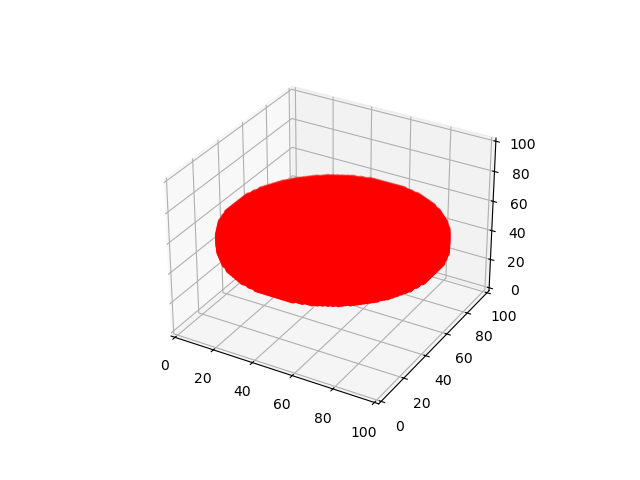

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.scatter(X, Y, Z, color='r', label='real space')
#ax.scatter(Xf, Yf, Zf, color='b', label='reciprocal space')

ax.set_xlim(0,data.shape[0])
ax.set_ylim(0,data.shape[1])
ax.set_zlim(0,data.shape[2]);

## Perform Fourier transform

In [10]:
r_data = np.fft.fftshift(np.fft.fftn(np.fft.fftshift(data)))

r_data = np.log(1+np.abs(r_data))
r_data[r_data<r_data.max()*.8] = 0
r_data[r_data>0]=1

Xf, Yf, Zf = np.where(r_data>0)

## Plot Data Fast

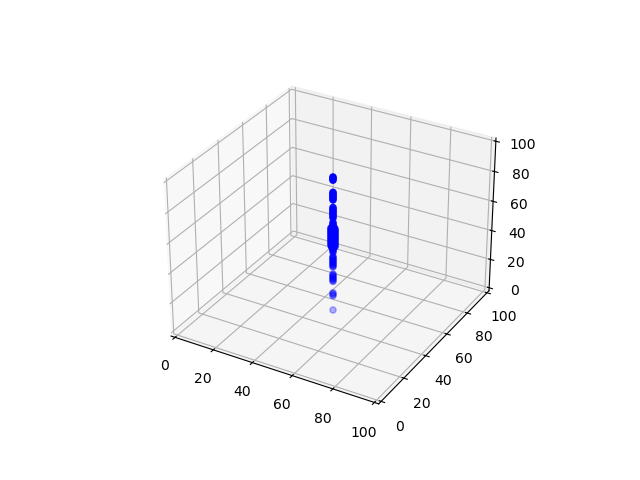

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.scatter(X, Y, Z, color='r', label='real space')
ax.scatter(Xf, Yf, Zf, color='b', label='reciprocal space')

ax.set_xlim(0,data.shape[0])
ax.set_ylim(0,data.shape[1])
ax.set_zlim(0,data.shape[2]);

## Slow Plotting Routine

<IPython.core.display.Javascript object>


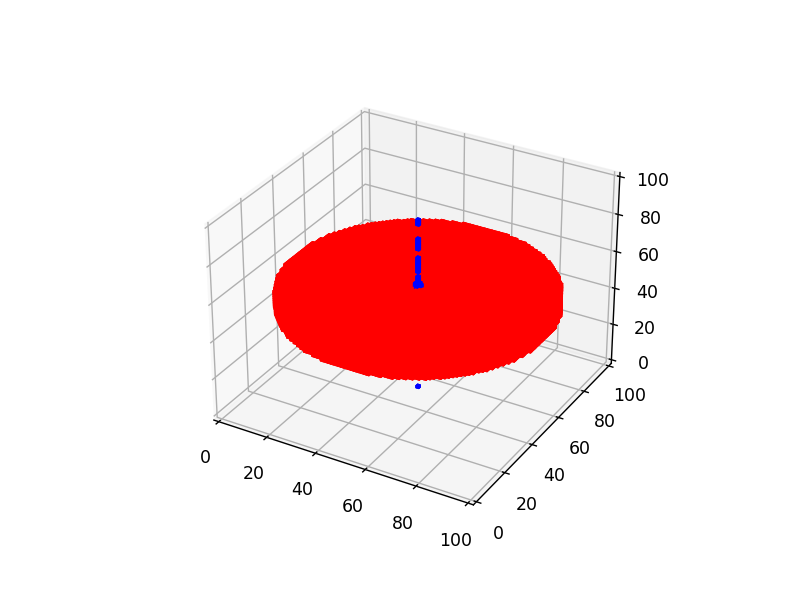

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.voxels(r_data, color='b')
ax.voxels(data, color='r')

ax.set_xlim(0,data.shape[0])
ax.set_ylim(0,data.shape[1])
ax.set_zlim(0,data.shape[2]);


## Conclusion

The shape of the Fourier Transform of the sample is called **relrod**.

This relrod replaces any point in recirpocal lattice.


We can conclude a few points from this notebook:
- The relrod is **perpendicular to the sample**
- The relrod is the major contribution to the excitation error. 


The surface of the sample may not be exactly perpendicular to the zone axis and has to be considered in our calulations
